## Library

In [1]:
import os
import math
import dill
import random
import numpy as np
import squigglepy as sq
from squigglepy.numbers import K

from copy import copy, deepcopy
from scipy import stats
from pprint import pprint
from datetime import datetime as dt

exec(open('utils.py').read())
print('Loaded')

exec(open('modules/anchors.py').read())
print('Loaded')

if not os.path.exists('caches'):
    os.makedirs('caches')

%matplotlib inline

Loaded
Loaded


## Human brain (log FLOP/s)

In [2]:
# https://www.openphilanthropy.org/research/how-much-computational-power-does-it-take-to-match-the-human-brain/
# https://www.metaculus.com/questions/2646/what-will-the-necessary-computational-power-to-replicate-human-mental-capability-turn-out-to-be/
human_brain = sq.mixture([[0.5, sq.lognorm(13, 17, credibility=80)],
                          [0.5, sq.lognorm(13, 24, credibility=80)]])
sq.get_percentiles(human_brain @ 10000, digits=1)

{1: 10.6,
 5: 12.3,
 10: 13.0,
 20: 13.8,
 30: 14.5,
 40: 15.1,
 50: 15.7,
 60: 16.4,
 70: 17.3,
 80: 18.9,
 90: 21.6,
 95: 24.1,
 99: 28.9}

Simple lifetime
{1: 19.7,
 5: 21.2,
 10: 21.9,
 20: 22.8,
 30: 23.4,
 40: 24.0,
 50: 24.6,
 60: 25.3,
 70: 26.3,
 80: 27.9,
 90: 30.6,
 95: 32.9,
 99: 37.9}
-
GPT2 can do it: 7.3%
GPT3 can do it: 31.2%
GPT4 can do it: 59.7%
100x GPT4 can do it: 76.7%
-


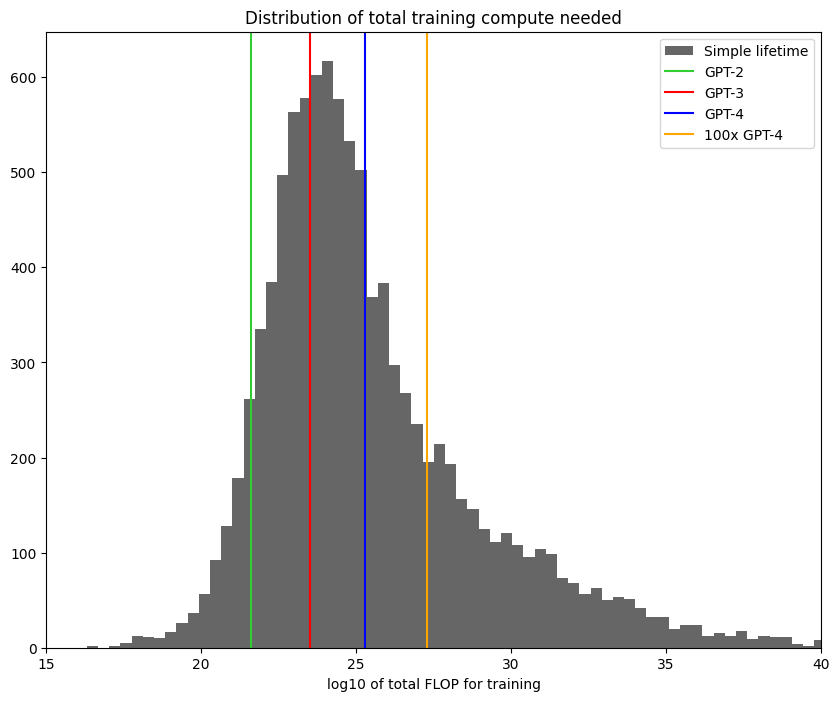

In [3]:
simple_lifetime_anchor = tai_log_flop_needs(brain=human_brain,
                                            horizon_length=np.log10(thirty_years_in_seconds),
                                            ref_params=0,
                                            ref_params_samples=0,
                                            bayes_update=None)

plot_anchors(anchor1=simple_lifetime_anchor @ 10000,
             label1='Simple lifetime',
             anchor2=compute['GPT-2'],
             label2='GPT-2',
             anchor3=compute['GPT-3'],
             label3='GPT-3',
             anchor4=compute['GPT-4'],
             label4='GPT-4',
             anchor5=compute['GPT-4'] + 2,
             label5='100x GPT-4',
             disable_ci_lines=True,
             xlim=[15,40])

Simple lifetime
{1: 19.7,
 5: 21.3,
 10: 21.9,
 20: 22.8,
 30: 23.4,
 40: 24.0,
 50: 24.6,
 60: 25.3,
 70: 26.3,
 80: 27.7,
 90: 30.4,
 95: 32.8,
 99: 37.6}
-
GPT2 can do it: 7.2%
GPT3 can do it: 31.4%
GPT4 can do it: 59.8%
100x GPT4 can do it: 77.6%
-
Cotra lifetime
{1: 25.3,
 5: 26.2,
 10: 26.7,
 20: 27.2,
 30: 27.7,
 40: 28.1,
 50: 28.5,
 60: 29.0,
 70: 29.8,
 80: 31.4,
 90: 34.0,
 95: 36.2,
 99: 41.4}
-
GPT2 can do it: <0.1%
GPT3 can do it: <0.1%
GPT4 can do it: 0.8%
100x GPT4 can do it: 21.4%
-


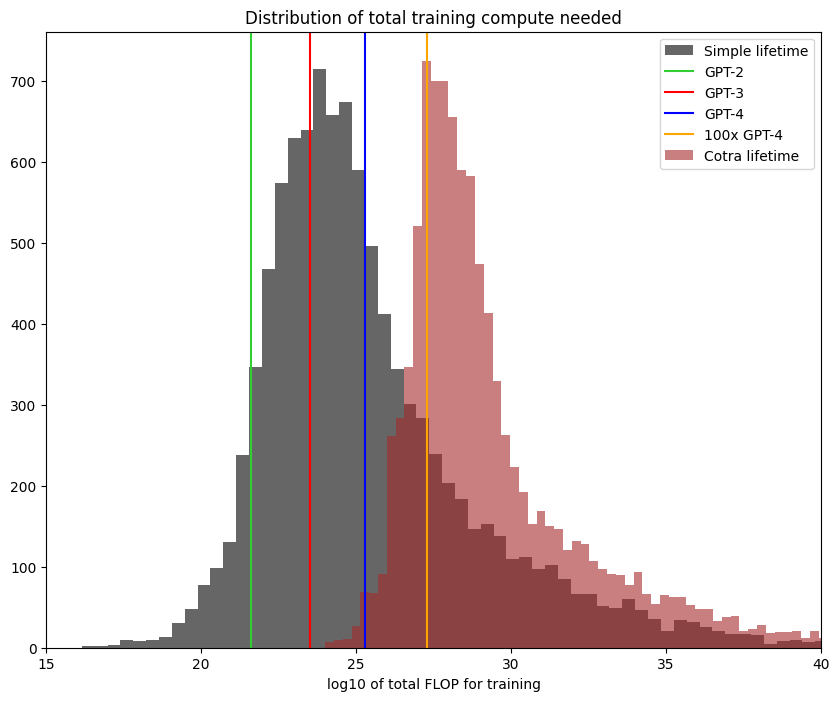

In [4]:
cotra_lifetime_anchor = tai_log_flop_needs(brain=human_brain,
                                           efficiency=sq.lognorm(2,5),
                                           horizon_length=9,
                                           ref_params=0,
                                           ref_params_samples=0,
                                           bayes_update=cotra_bayes_update_against_low_flop)


plot_anchors(anchor1=simple_lifetime_anchor @ 10000,
             label1='Simple lifetime',
             anchor2=compute['GPT-2'],
             label2='GPT-2',
             anchor3=compute['GPT-3'],
             label3='GPT-3',
             anchor4=compute['GPT-4'],
             label4='GPT-4',
             anchor5=compute['GPT-4'] + 2,
             label5='100x GPT-4',
             anchor6=cotra_lifetime_anchor @ 10000,
             label6='Cotra lifetime',
             disable_ci_lines=True,
             xlim=[15,40])

## Cotra's Short NN Anchor

Short NN
{1: 25.2,
 5: 26.5,
 10: 27.2,
 20: 28.2,
 30: 29.2,
 40: 30.4,
 50: 31.7,
 60: 33.0,
 70: 34.3,
 80: 36.0,
 90: 38.4,
 95: 40.6,
 99: 44.4}
-
GPT2 can do it: <0.1%
GPT3 can do it: <0.1%
GPT4 can do it: 1.3%
100x GPT4 can do it: 11.0%
-


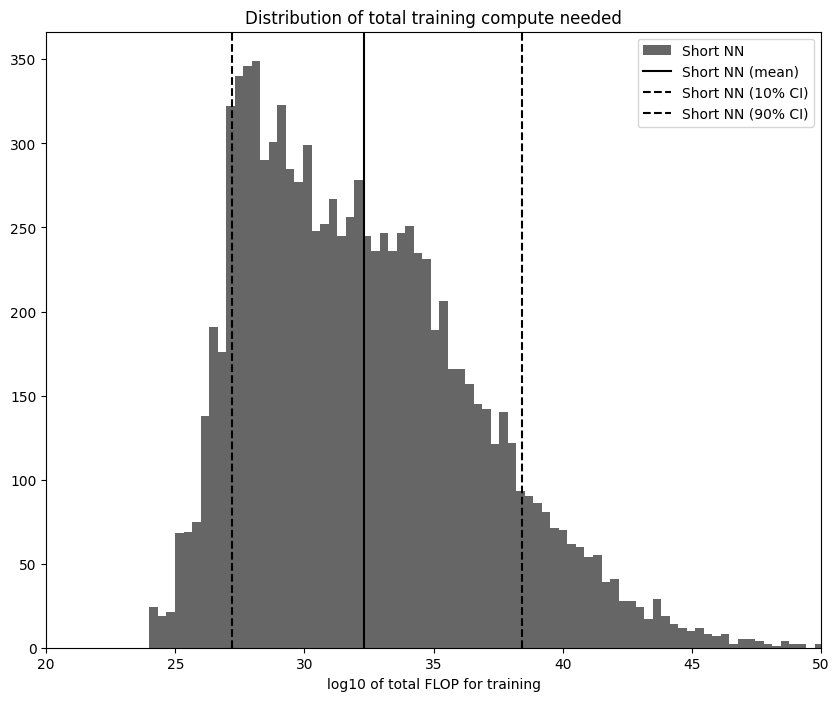

In [5]:
short_horizon_nn_anchor = cotra_anchor(horizon_length=sq.norm(0,3))
plot_anchors(short_horizon_nn_anchor @ 10000, xlim=[20, 50], label1='Short NN')

Cotra's Short NN, Before update
{1: 21.3,
 5: 24.1,
 10: 25.8,
 20: 27.7,
 30: 29.1,
 40: 30.4,
 50: 31.6,
 60: 32.9,
 70: 34.2,
 80: 35.9,
 90: 38.3,
 95: 40.4,
 99: 44.5}
-
GPT2 can do it: 1.2%
GPT3 can do it: 3.6%
GPT4 can do it: 8.4%
100x GPT4 can do it: 17.9%
-
Cotra's Short NN, After update
{1: 25.1,
 5: 26.5,
 10: 27.2,
 20: 28.2,
 30: 29.2,
 40: 30.4,
 50: 31.7,
 60: 33.0,
 70: 34.3,
 80: 36.0,
 90: 38.5,
 95: 40.6,
 99: 44.7}
-
GPT2 can do it: <0.1%
GPT3 can do it: <0.1%
GPT4 can do it: 1.3%
100x GPT4 can do it: 10.8%
-


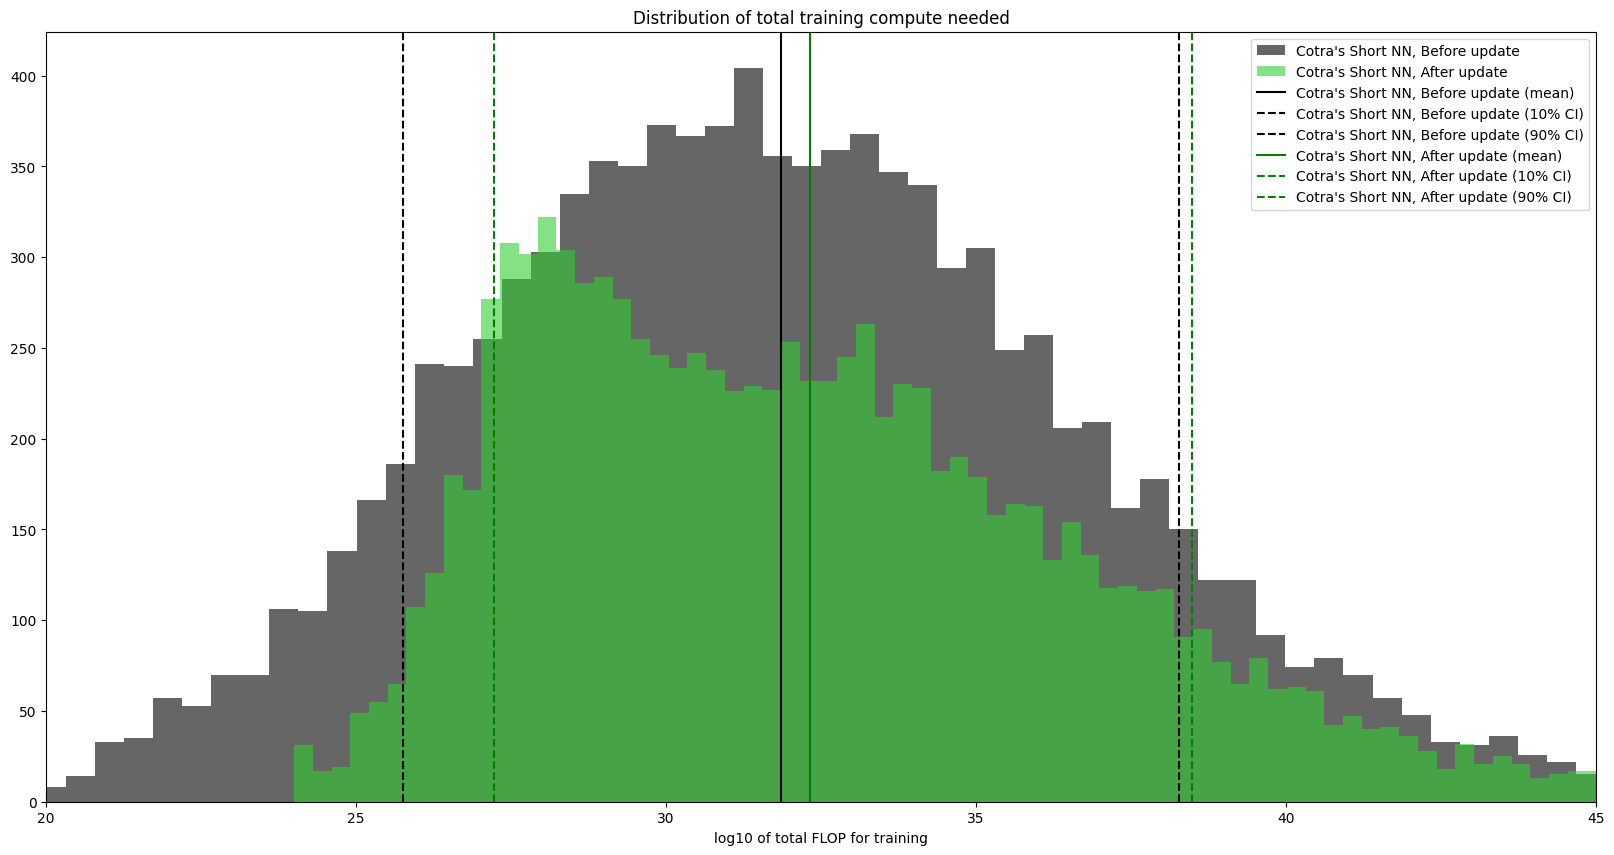

In [6]:
short_no_update = cotra_anchor(horizon_length=sq.norm(0,3), bayes_update=None)
plot_anchors(short_no_update @ 10000,
             short_horizon_nn_anchor @ 10000,
             label1='Cotra\'s Short NN, Before update',
             label2='Cotra\'s Short NN, After update',
             xlim=[20, 45],
             figsize=(20, 10))

## Cotra's Medium NN Anchor

Medium NN
{1: 26.5,
 5: 27.7,
 10: 28.8,
 20: 30.7,
 30: 32.2,
 40: 33.4,
 50: 34.7,
 60: 35.9,
 70: 37.3,
 80: 38.9,
 90: 41.4,
 95: 43.3,
 99: 47.2}
-
GPT2 can do it: <0.1%
GPT3 can do it: <0.1%
GPT4 can do it: 0.2%
100x GPT4 can do it: 3.0%
-


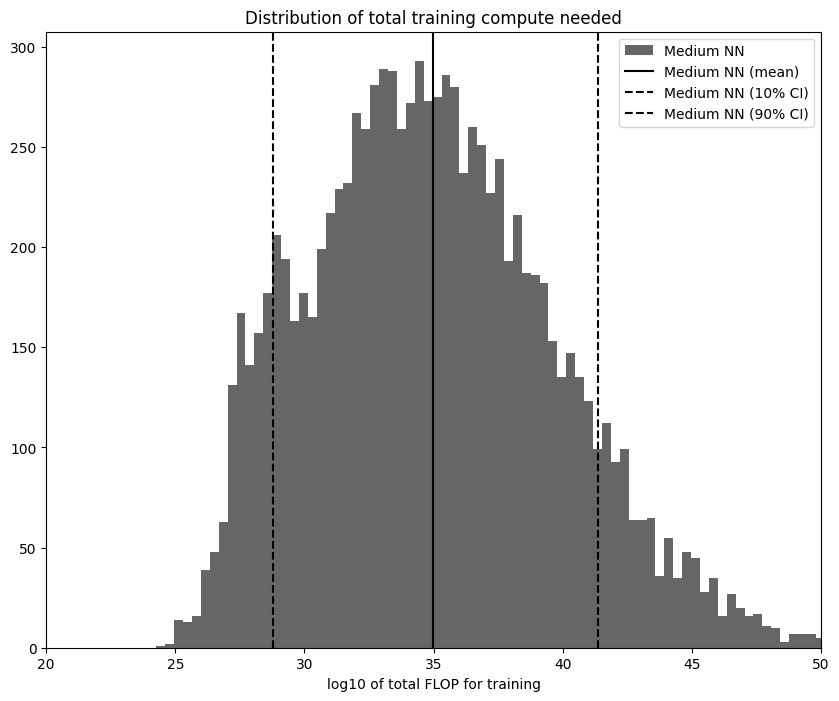

In [7]:
medium_horizon_nn_anchor = cotra_anchor(horizon_length=sq.norm(3,6))
plot_anchors(medium_horizon_nn_anchor @ 10000, xlim=[20, 50], label1='Medium NN')

## Cotra's Long NN Anchor

Long NN
{1: 27.6,
 5: 30.0,
 10: 31.7,
 20: 33.7,
 30: 35.2,
 40: 36.6,
 50: 37.7,
 60: 39.0,
 70: 40.3,
 80: 42.0,
 90: 44.4,
 95: 46.6,
 99: 50.5}
-
GPT2 can do it: <0.1%
GPT3 can do it: <0.1%
GPT4 can do it: <0.1%
100x GPT4 can do it: 0.7%
-


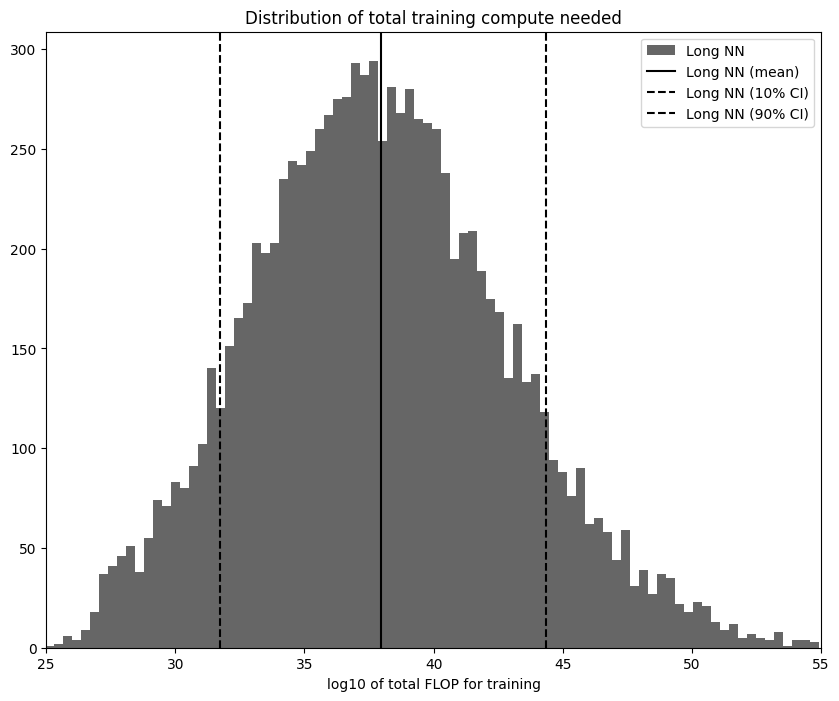

In [8]:
long_horizon_nn_anchor = cotra_anchor(horizon_length=sq.norm(6,9))
plot_anchors(long_horizon_nn_anchor @ 10000, xlim=[25, 55], label1='Long NN')

## Cotra's GPT Anchor

GPT NN
{1: 24.7,
 5: 26.0,
 10: 26.6,
 20: 27.5,
 30: 28.2,
 40: 29.1,
 50: 30.2,
 60: 31.4,
 70: 32.9,
 80: 34.6,
 90: 36.9,
 95: 39.0,
 99: 43.2}
-
GPT2 can do it: <0.1%
GPT3 can do it: <0.1%
GPT4 can do it: 2.4%
100x GPT4 can do it: 17.8%
-


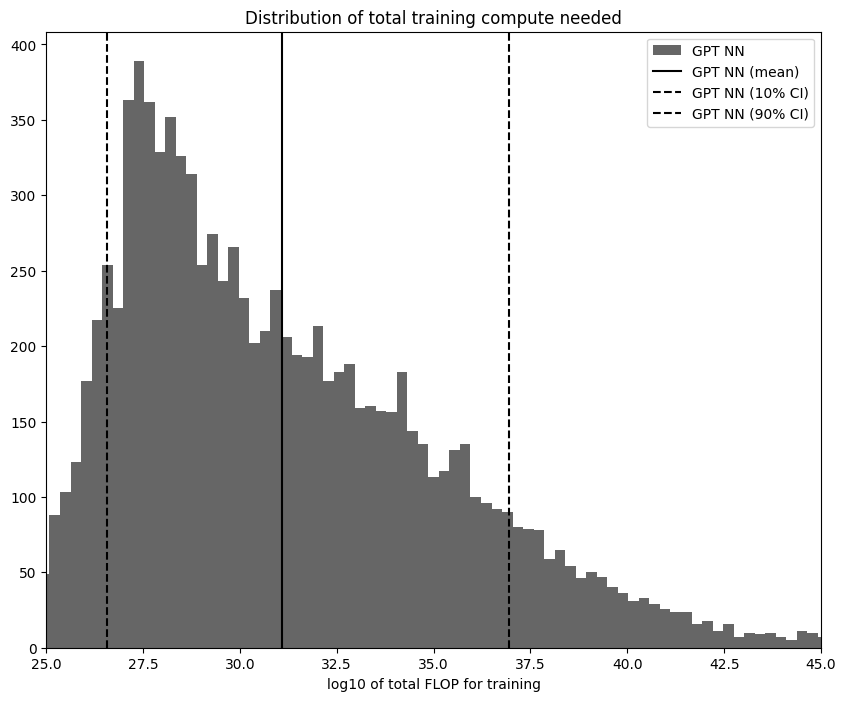

In [9]:
gpt_anchor = cotra_anchor(horizon_length=0)
plot_anchors(gpt_anchor @ 10000, xlim=[25, 45], label1='GPT NN')

Cotra's GPT NN, Before update
{1: 19.8,
 5: 22.8,
 10: 24.3,
 20: 26.3,
 30: 27.7,
 40: 28.9,
 50: 30.2,
 60: 31.4,
 70: 32.7,
 80: 34.4,
 90: 36.8,
 95: 38.8,
 99: 43.1}
-
GPT2 can do it: 2.8%
GPT3 can do it: 6.8%
GPT4 can do it: 14.7%
100x GPT4 can do it: 27.2%
-
Cotra's GPT NN, After update
{1: 24.9,
 5: 26.0,
 10: 26.6,
 20: 27.4,
 30: 28.2,
 40: 29.1,
 50: 30.2,
 60: 31.5,
 70: 32.8,
 80: 34.4,
 90: 36.7,
 95: 38.7,
 99: 42.7}
-
GPT2 can do it: <0.1%
GPT3 can do it: <0.1%
GPT4 can do it: 2.0%
100x GPT4 can do it: 18.1%
-


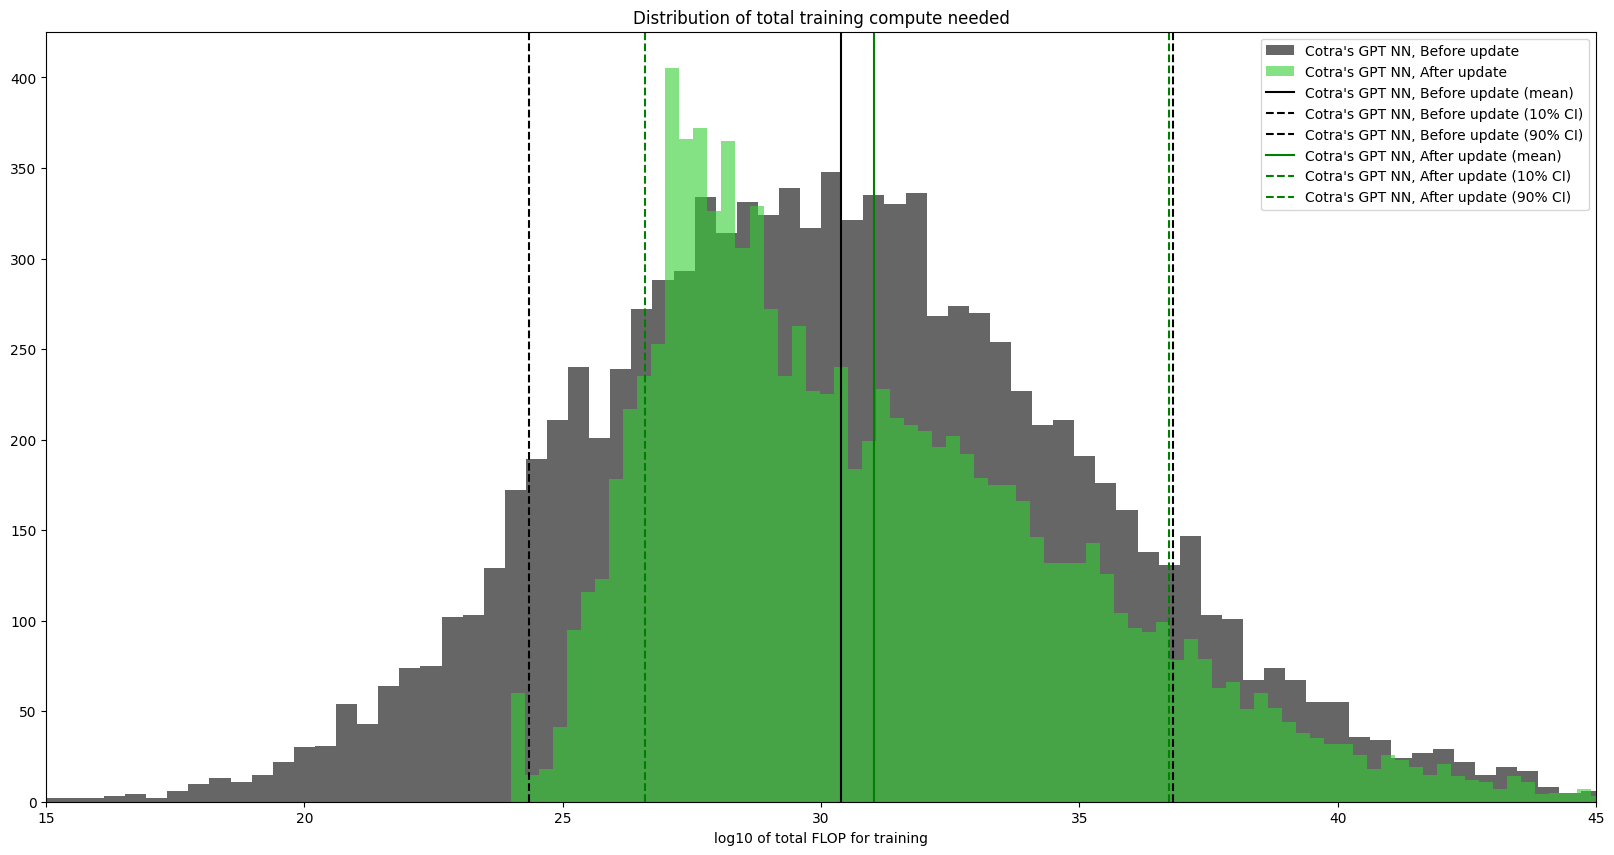

In [10]:
gpt_no_update = cotra_anchor(horizon_length=0, bayes_update=None)
plot_anchors(gpt_no_update @ 10000,
             gpt_anchor @ 10000,
             label1='Cotra\'s GPT NN, Before update',
             label2='Cotra\'s GPT NN, After update',
             xlim=[15, 45],
             figsize=(20, 10))

## Cotra's Lifetime Anchor

Lifetime
{1: 25.1,
 5: 26.1,
 10: 26.6,
 20: 27.3,
 30: 27.8,
 40: 28.3,
 50: 28.9,
 60: 29.7,
 70: 30.6,
 80: 31.9,
 90: 33.5,
 95: 34.9,
 99: 37.6}
-
GPT2 can do it: <0.1%
GPT3 can do it: <0.1%
GPT4 can do it: 1.7%
100x GPT4 can do it: 20.0%
-


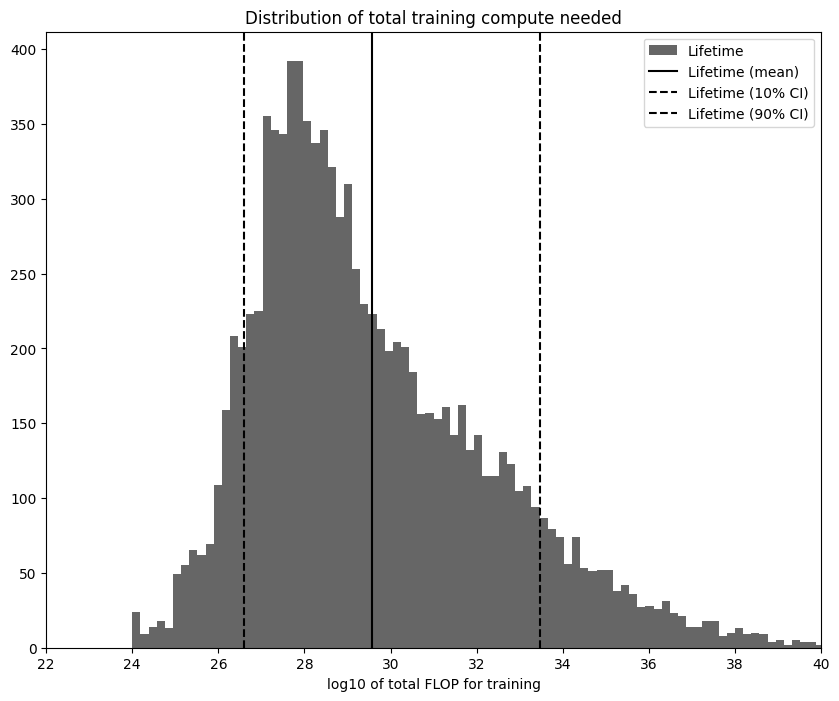

In [11]:
lifetime_anchor = tai_log_flop_needs(brain=sq.lognorm(11,19.5),
                                     efficiency=sq.mixture([sq.lognorm(2,5),
                                                            sq.lognorm(5,9)]),
                                     transformative_vs_human=sq.norm(-2,2),
                                     horizon_length=9,
                                     scaling_exponent=0,
                                     flops_per_param_per_sec=0,
                                     ref_params_samples=0,
                                     bayes_update=cotra_bayes_update_against_low_flop)
plot_anchors(lifetime_anchor @ 10000, xlim=[22, 40], label1='Lifetime')

## Cotra's Evolution Anchor

Evolution
{1: 32.1,
 5: 34.7,
 10: 36.1,
 20: 37.7,
 30: 39.0,
 40: 39.9,
 50: 40.9,
 60: 41.8,
 70: 42.8,
 80: 44.0,
 90: 45.6,
 95: 47.1,
 99: 49.7}
-
GPT2 can do it: <0.1%
GPT3 can do it: <0.1%
GPT4 can do it: <0.1%
100x GPT4 can do it: <0.1%
-


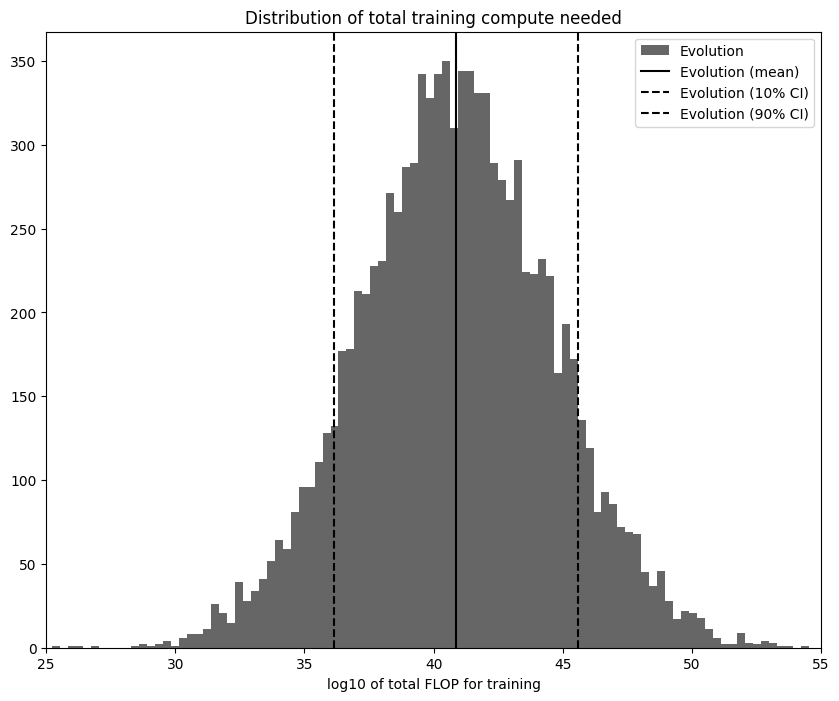

In [12]:
average_ancestor_brain_flops = sq.lognorm(3,6)
log_n_individuals = sq.norm(20,22)
evo_time_log_sec = 16
evolution_anchor = tai_log_flop_needs(brain=average_ancestor_brain_flops,
                                      efficiency=sq.norm(-6,5), # TODO: This seems not quite right
                                      transformative_vs_human=sq.norm(-2,2),
                                      horizon_length=log_n_individuals + evo_time_log_sec,
                                      scaling_exponent=0,
                                      flops_per_param_per_sec=0,
                                      ref_params_samples=0,
                                      bayes_update=None)
plot_anchors(evolution_anchor @ 10000, xlim=[25, 55], label1='Evolution')


## Cotra's Genome Anchor

Genome
{1: 26.9,
 5: 27.9,
 10: 29.0,
 20: 30.5,
 30: 31.8,
 40: 32.8,
 50: 33.7,
 60: 34.8,
 70: 35.9,
 80: 37.2,
 90: 39.0,
 95: 40.6,
 99: 43.7}
-
GPT2 can do it: <0.1%
GPT3 can do it: <0.1%
GPT4 can do it: <0.1%
100x GPT4 can do it: 2.4%
-


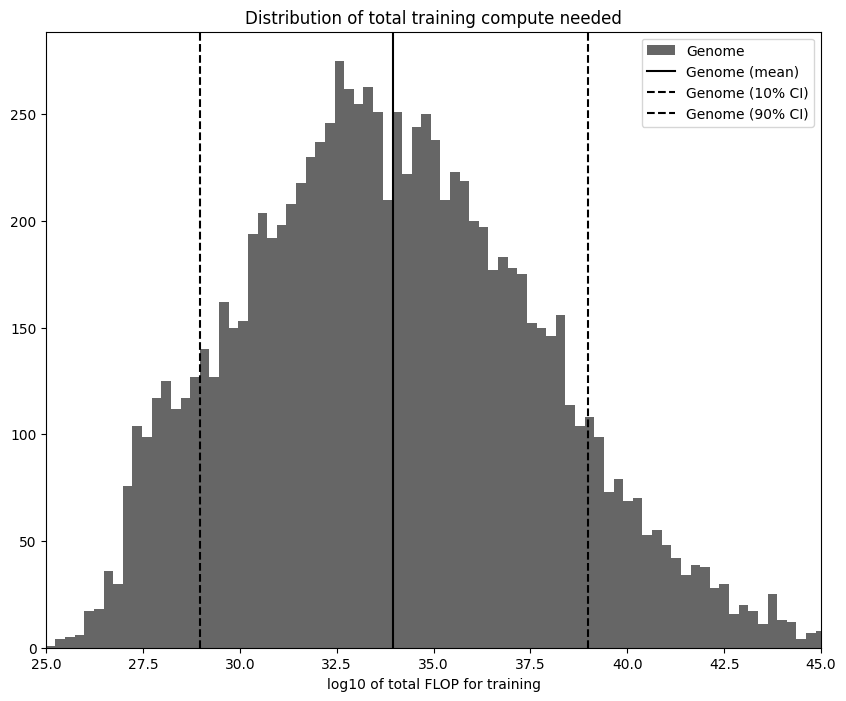

In [13]:
genome_anchor = tai_log_flop_needs(brain=sq.lognorm(11,19.5),
                                   params=sq.norm(mean=8.7, sd=0.35), # There are ~10^8.7 'params' in genome
                                   efficiency=sq.norm(0,2),
                                   transformative_vs_human=sq.norm(-2,2),
                                   horizon_length=sq.norm(7,9),
                                   scaling_exponent=sq.norm(0.5,1.1),
                                   flops_per_param_per_sec=sq.norm(1,2),
                                   bayes_update=cotra_bayes_update_against_low_flop)
plot_anchors(genome_anchor @ 10000, xlim=[25, 45], label1='Genome')


## Chinchilla Scaling Law Update

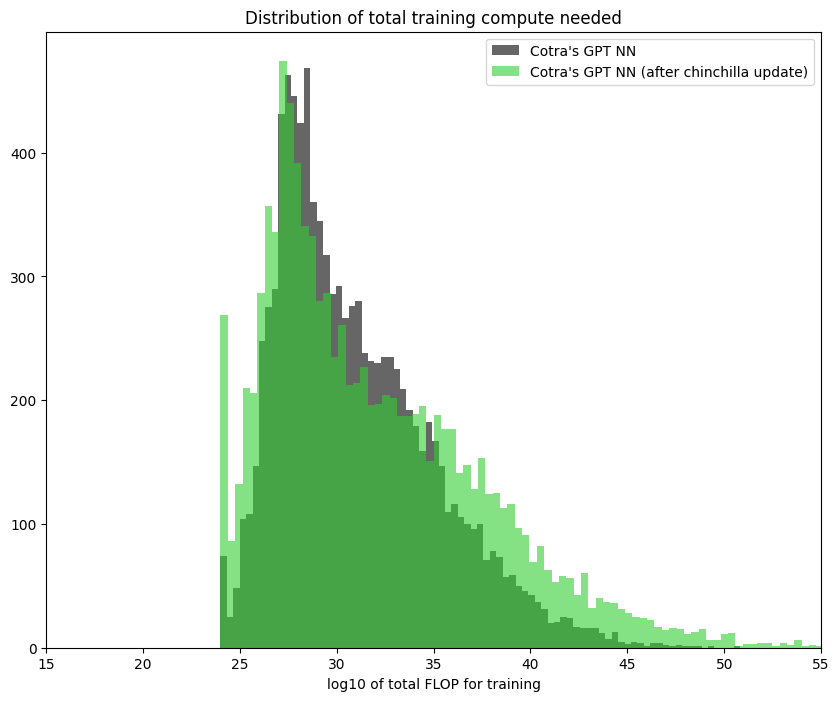

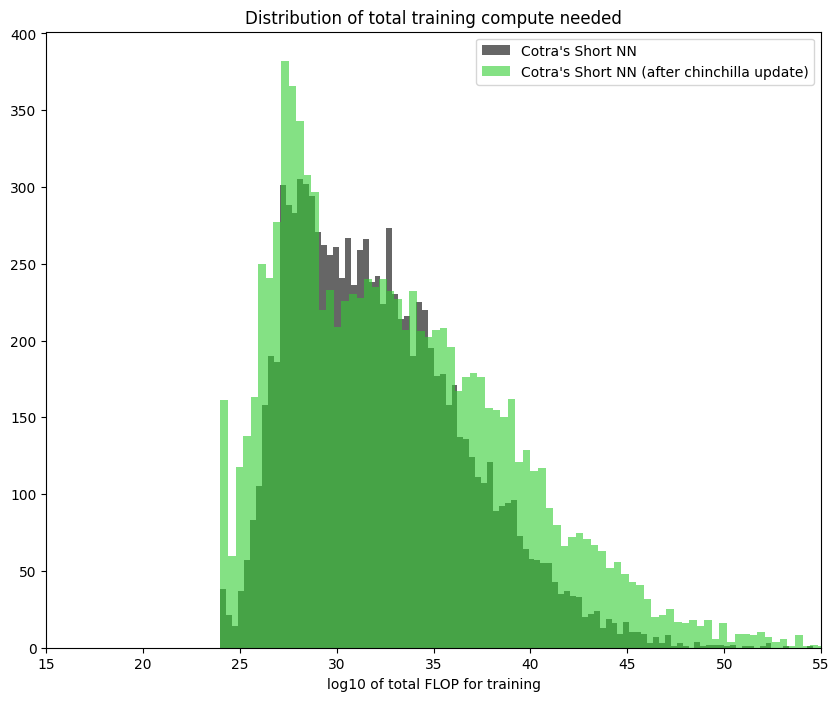

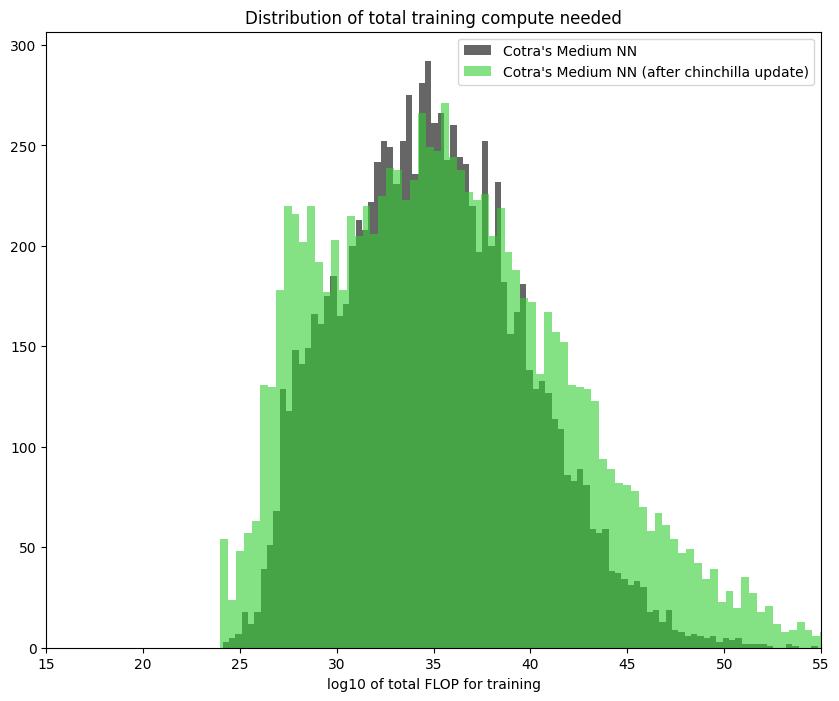

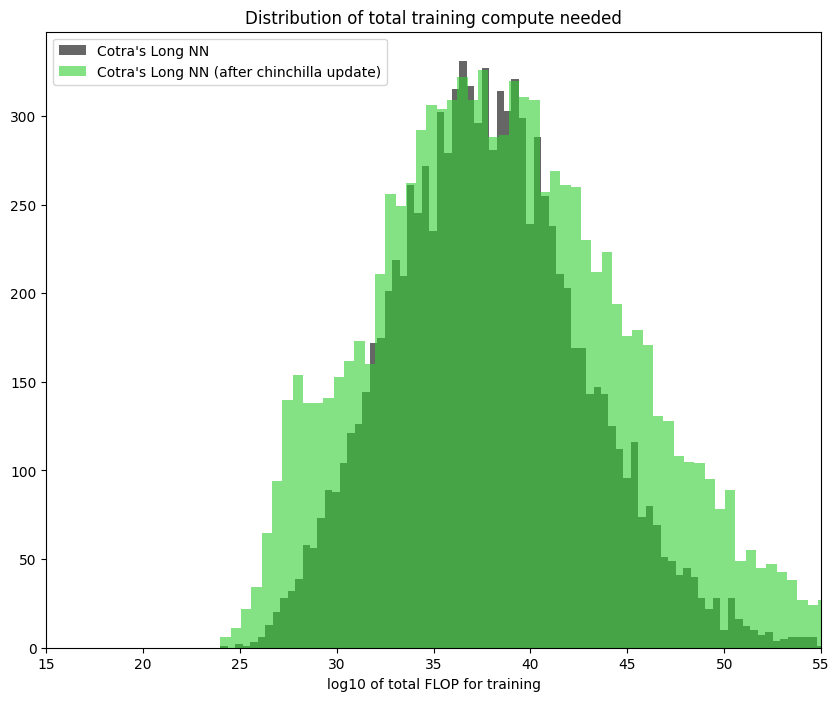

In [14]:
gpt_anchor_chinchilla = cotra_anchor(horizon_length=0, chinchilla=True)
short_horizon_nn_anchor_chinchilla = cotra_anchor(horizon_length=sq.norm(0,3), chinchilla=True)
medium_horizon_nn_anchor_chinchilla = cotra_anchor(horizon_length=sq.norm(3,6), chinchilla=True)
long_horizon_nn_anchor_chinchilla = cotra_anchor(horizon_length=sq.norm(6,9), chinchilla=True)

for anchors in [[gpt_anchor @ 10000, gpt_anchor_chinchilla @ 10000, 'Cotra\'s GPT NN'],
                [short_horizon_nn_anchor @ 10000, short_horizon_nn_anchor_chinchilla @ 10000, 'Cotra\'s Short NN'],
                [medium_horizon_nn_anchor @ 10000, medium_horizon_nn_anchor_chinchilla @ 10000, 'Cotra\'s Medium NN'],
                [long_horizon_nn_anchor @ 10000, long_horizon_nn_anchor_chinchilla @ 10000, 'Cotra\'s Long NN']]:
    plot_anchors(anchors[0],
                 anchors[1],
                 label1=anchors[2],
                 label2=anchors[2] + ' (after chinchilla update)',
                 xlim=[15, 55],
                 disable_ci_lines=True,
                 verbose=False)

## Updated Evolution Anchor

Cotra's evolution anchor
{1: 32.1,
 5: 34.7,
 10: 36.1,
 20: 37.7,
 30: 38.9,
 40: 39.9,
 50: 40.8,
 60: 41.7,
 70: 42.8,
 80: 43.9,
 90: 45.6,
 95: 46.9,
 99: 49.5}
-
GPT2 can do it: <0.1%
GPT3 can do it: <0.1%
GPT4 can do it: <0.1%
100x GPT4 can do it: <0.1%
-
Updated evolution anchor
{1: 32.2,
 5: 34.9,
 10: 36.3,
 20: 38.1,
 30: 39.3,
 40: 40.3,
 50: 41.3,
 60: 42.3,
 70: 43.4,
 80: 44.7,
 90: 46.5,
 95: 48.1,
 99: 51.1}
-
GPT2 can do it: <0.1%
GPT3 can do it: <0.1%
GPT4 can do it: <0.1%
100x GPT4 can do it: <0.1%
-


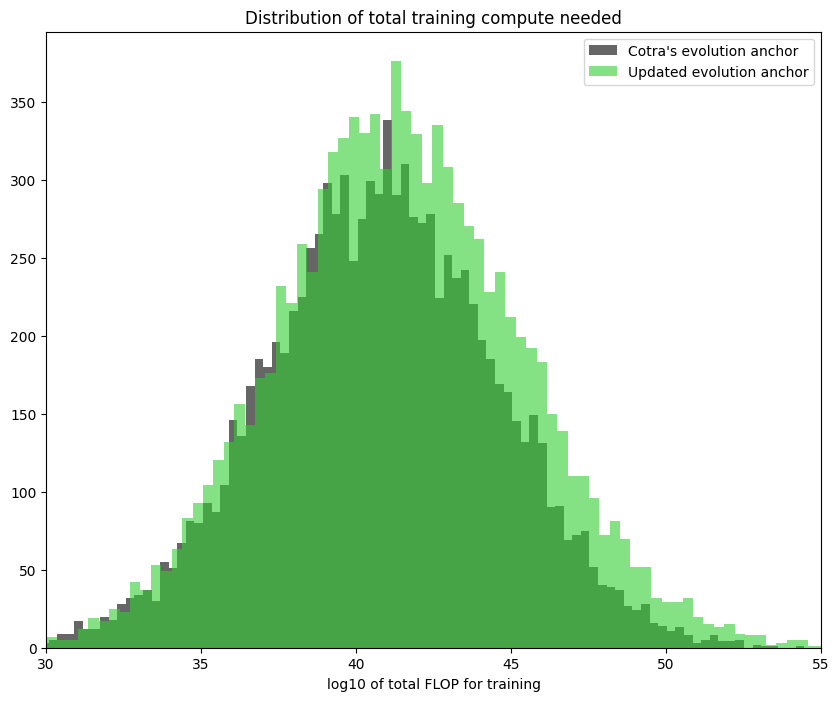

In [15]:
anthropic_adjustment = sq.norm(-1.3,1.3)
environment_adjustment = sq.mixture([[0.2, sq.lognorm(1,5)], [0.8, 0]])     # https://forum.effectivealtruism.org/posts/FHTyixYNnGaQfEexH/a-concern-about-the-evolutionary-anchor-of-ajeya-cotra-s
updated_evolution_anchor = evolution_anchor + anthropic_adjustment + environment_adjustment

plot_anchors(evolution_anchor @ 10000,
             updated_evolution_anchor @ 10000,
             label1='Cotra\'s evolution anchor',
             label2='Updated evolution anchor',
             xlim=[30, 55],
             disable_ci_lines=True)


## Meta-anchor

#### Contra 2020

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [00:00<00:00, 2586681.47it/s]


Writing cache to file `caches/cotra_2020.sqcache.npy`...
...Cached
Anchor1
{1: 25.9,
 5: 27.3,
 10: 28.3,
 20: 30.2,
 30: 32.0,
 40: 33.6,
 50: 35.2,
 60: 36.8,
 70: 38.7,
 80: 41.1,
 90: 46.1,
 95: 63.7,
 99: 68.1}
-
GPT2 can do it: <0.1%
GPT3 can do it: <0.1%
GPT4 can do it: 0.5%
100x GPT4 can do it: 5.1%
-


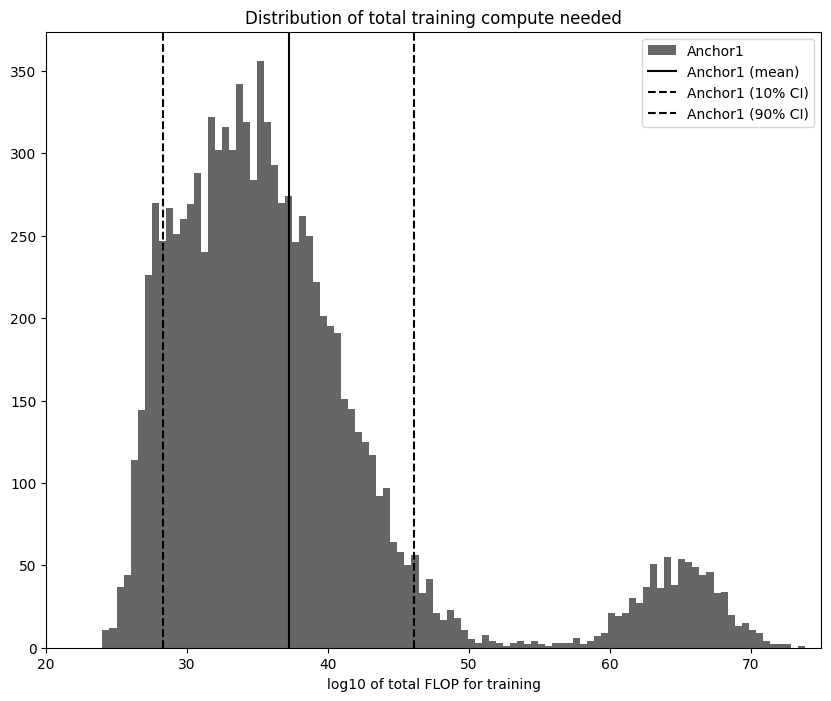

In [16]:
no_path_anchor = sq.norm(60,70)
cotra_2020 = sq.mixture([[0.052, lifetime_anchor],
                         [0.21, short_horizon_nn_anchor],
                         [0.11, genome_anchor],
                         [0.312, medium_horizon_nn_anchor],
                         [0.155, long_horizon_nn_anchor],
                         [0.091, evolution_anchor],
                         [0.07, no_path_anchor]])
cotra_2020_samples = sq.sample(cotra_2020, dump_cache_file='caches/cotra_2020', n=10000, verbose=True)
plot_anchors(cotra_2020_samples)


#### Backderive Cotra 2022

In [17]:
from bayes_opt import BayesianOptimization

print('Presampling...')
a1 = sq.sample(lifetime_anchor, n=100*K, verbose=True)
a2 = sq.sample(gpt_anchor, n=100*K, verbose=True)
a3 = sq.sample(short_horizon_nn_anchor, n=100*K, verbose=True)
a4 = sq.sample(genome_anchor, n=100*K, verbose=True)
a5 = sq.sample(medium_horizon_nn_anchor, n=100*K, verbose=True)
a6 = sq.sample(long_horizon_nn_anchor, n=100*K, verbose=True)
a7 = sq.sample(evolution_anchor, n=100*K, verbose=True)
a8 = sq.sample(no_path_anchor, n=100*K, verbose=True)

anchors = [a1, a2, a3, a4, a5, a6, a7, a8]

print('Loading optimizer...')

def find_anchors(lifetime_, gpt_, genome_, medium_, long_, evo_, noop_):
    short_ = 1 - lifetime_ - gpt_ - genome_ - medium_ - long_ - evo_ - noop_
    
    if short_ < 0:
        return -10
    
    weights = [lifetime_, gpt_, genome_, medium_, long_, evo_, noop_]
    
    def _run_mixture(picker, i):
        for j, w in enumerate(weights):
            if picker < w:
                return anchors[j][i]
        return anchors[-1][i]

    weights = np.cumsum(weights)
    picker = sq.uniform_sample(0, 1, samples=100*K)
    out = [_run_mixture(p, i) for i, p in enumerate(picker)]
    f_test = sq.get_percentiles(out, percentiles=[10, 15, 35, 50, 60], digits=1)
    f_actual = {10: 28, 15: 29.5, 35: 31.7, 50: 32.7, 60: 35}
    f_diff = {k: round(v - f_test[k], 1) for k, v in f_actual.items()}
    error = sum([np.abs(v) for v in f_diff.values()]) + np.abs(f_diff[50]) * 4
    return -error


pbounds = {'lifetime_': (0.01, 0.4),
           'gpt_': (0.01, 0.4),
           'genome_': (0.01, 0.2),
           'medium_': (0.01, 0.4),
           'long_': (0.01, 0.2),
           'evo_': (0.01, 0.05),
           'noop_': (0.01, 0.05)}
optimizer = BayesianOptimization(f=find_anchors, pbounds=pbounds, allow_duplicate_points=True)

optimizer.probe(params={'evo_': 0.01, 'genome_': 0.05, 'gpt_': 0.06, 'lifetime_': 0.1, 'long_': 0.16, 'medium_': 0.56, 'noop_': 0.01}, lazy=True)
optimizer.probe(params={'evo_': 0.02, 'genome_': 0.16, 'gpt_': 0.03, 'lifetime_': 0.23, 'long_': 0.15, 'medium_': 0.45, 'noop_': 0.03}, lazy=True)
optimizer.probe(params={'evo_': 0.03, 'genome_': 0.09, 'gpt_': 0.33, 'lifetime_': 0.08, 'long_': 0.03, 'medium_': 0.34, 'noop_': 0.05}, lazy=True)

optimizer.maximize(init_points=40, n_iter=100)

m = optimizer.max
dd = copy(m['params'])
dd['short_'] = 1 - sum(dd.values())
dd

Presampling...


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100000/100000 [00:00<00:00, 2847804.89it/s]


Loading optimizer...
|   iter    |  target   |   evo_    |  genome_  |   gpt_    | lifetime_ |   long_   |  medium_  |   noop_   |
-------------------------------------------------------------------------------------------------------------
| 1         | -5.4      | 0.01      | 0.05      | 0.06      | 0.1       | 0.16      | 0.56      | 0.01      |
| 2         | -10.0     | 0.02      | 0.16      | 0.03      | 0.23      | 0.15      | 0.45      | 0.03      |
| 3         | -4.0      | 0.03      | 0.09      | 0.33      | 0.08      | 0.03      | 0.34      | 0.05      |
| 4         | -10.0     | 0.01041   | 0.1147    | 0.2426    | 0.1578    | 0.1879    | 0.3151    | 0.04963   |
| 5         | -11.6     | 0.01257   | 0.1319    | 0.2342    | 0.2868    | 0.07788   | 0.1363    | 0.01187   |
| 6         | -10.0     | 0.03552   | 0.1137    | 0.314     | 0.2705    | 0.1446    | 0.1587    | 0.03397   |
| 7         | -11.9     | 0.03049   | 0.1847    | 0.1666    | 0.1464    | 0.02665   | 0.1438    | 0

{'evo_': 0.03,
 'genome_': 0.09,
 'gpt_': 0.33,
 'lifetime_': 0.08,
 'long_': 0.03,
 'medium_': 0.34,
 'noop_': 0.05,
 'short_': 0.04999999999999982}

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [00:00<00:00, 2420116.55it/s]


Writing cache to file `caches/cotra_2022.sqcache.npy`...
...Cached
Cotra (2022) guess
{1: 25.4,
 5: 26.5,
 10: 27.3,
 20: 28.5,
 30: 29.9,
 40: 31.4,
 50: 32.9,
 60: 34.5,
 70: 36.3,
 80: 38.5,
 90: 42.2,
 95: 50.2,
 99: 67.7}
-
GPT2 can do it: <0.1%
GPT3 can do it: <0.1%
GPT4 can do it: 0.9%
100x GPT4 can do it: 9.5%
-


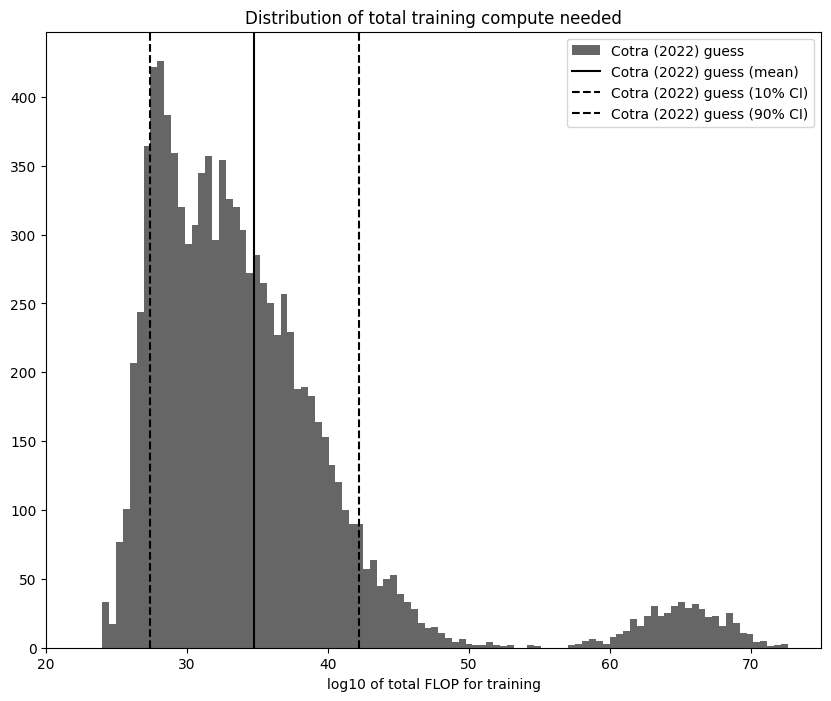

In [18]:
c2022_anchor_mix = [[dd['lifetime_'], lifetime_anchor],
                    [dd['gpt_'], gpt_anchor],
                    [dd['short_'], short_horizon_nn_anchor],
                    [dd['genome_'], genome_anchor],
                    [dd['medium_'], medium_horizon_nn_anchor],
                    [dd['long_'], long_horizon_nn_anchor],
                    [dd['evo_'], evolution_anchor],
                    [dd['noop_'], no_path_anchor]]
cotra_2022 = sq.mixture(c2022_anchor_mix)
cotra_2022_samples = sq.sample(cotra_2022, dump_cache_file='caches/cotra_2022', n=10000, verbose=True)
plot_anchors(cotra_2022_samples, label1='Cotra (2022) guess')

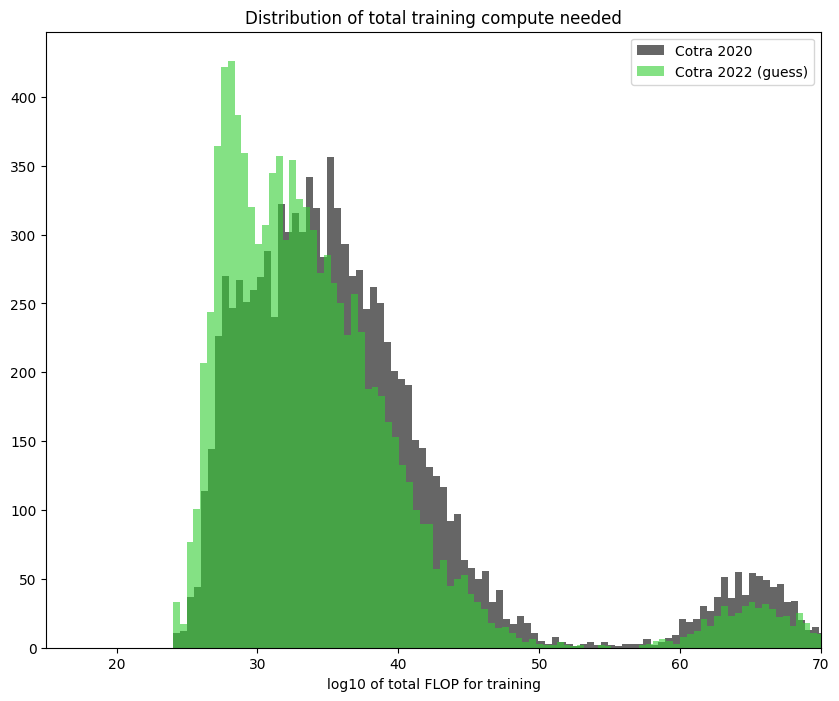

In [19]:
plot_anchors(cotra_2020_samples,
             cotra_2022_samples,
             label1='Cotra 2020',
             label2='Cotra 2022 (guess)',
             xlim=[15,70],
             disable_ci_lines=True,
             verbose=False)

In [20]:
print('File last ran: {}'.format(dt.now()))

File last ran: 2024-03-15 15:25:20.522549
